# Project 11 - Credit card default propensity prediction

__Objective__ – Predict the probability of a customer defaulting payment for the credit card the subsequent month, based on past information. The past information is provided in the dataset. This probability will help the collections team to prioritise follow up with customers who have a high propensity of defaulting.

## Project instructions
1.	Perform the required data pre-processing to treat for missing values and outliers
2.	Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3.	Identify any multi-collinearity and perform dimensionality reduction like PCA if required
4.	Use the original X variables or the components from PCA & divide the given data into train and test sets
5.	Build a model to predict the default propensity of a customer
6.	Evaluate the model based on model performance measures for classification and recommend the most suitable model.
7.	Come up with recommendations / actionable insights based on feature importance scores derived from the model.


## About the dataset
The dataset contains the following information of 30000 customers:

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration
Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?

Which variables are the strongest predictors of default payment?

Acknowledgements
Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.

# Additional information
1.	The difference between the bill amount and the past pay for a month will give an indication of the pending amount for each month and can be used as an additional X variable
2.	The average / sum of bill amount can be used as an additional X variable which will give an indication on the customer value.


In [2]:
import pandas as pd

creditdata = pd.read_csv('credit_card.csv')
creditdata.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 25 columns]

In [1]:
creditdata.head()

NameError: name 'creditdata' is not defined

In [4]:
creditdata.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [3]:
sns.scatterplot(creditdata['PAY_1'],creditdata['BILL_AMT1'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [7]:
creditdata.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

There are no NULL/Missing values in the dataset

In [6]:
creditdata.describe().T

count           mean            std       min       25%  \
ID         30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_1      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULT    30000.0       0.221200       0.415062       0.0      0.00   

                50%        75%        max  
ID          15000.5   22500.25    30000.0  
LIMIT_BAL  140000.0  240000.00  1000000.0  
SEX             2.0       2.00        2.0  
EDUCATION       2.0       2.00        6.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00       79.0  
PAY_1           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
DEFAULT         0.0       0.00        1.0

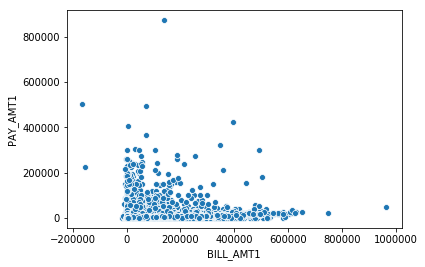

In [9]:
sns.scatterplot(creditdata['BILL_AMT1'],creditdata['PAY_AMT1'])
plt.show()

In [10]:
creditdata.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [2]:
creditdata[['LIMIT_BAL','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','DEFAULT']].head()

LIMIT_BAL  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0      20000      2      2     -1     -1     -2     -2       3913       3102   
1     120000     -1      2      0      0      0      2       2682       1725   
2      90000      0      0      0      0      0      0      29239      14027   
3      50000      0      0      0      0      0      0      46990      48233   
4      50000     -1      0     -1      0      0      0       8617       5670   

   BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0        689          0          0          0         0       689         0   
1       2682       3272       3455       3261         0      1000      1000   
2      13559      14331      14948      15549      1518      1500      1000   
3      49291      28314      28959      29547      2000      2019      1200   
4      35835      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0

In [3]:
creditdata[['LIMIT_BAL','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','DEFAULT']].tail()

LIMIT_BAL  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
29995     220000      0      0      0      0      0      0     188948   
29996     150000     -1     -1     -1     -1      0      0       1683   
29997      30000      4      3      2     -1      0      0       3565   
29998      80000      1     -1      0      0      0     -1      -1645   
29999      50000      0      0      0      0      0      0      47929   

       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29995     192815     208365      88004      31237      15980      8500   
29996       1828       3502       8979       5190          0      1837   
29997       3356       2758      20878      20582      19357         0   
29998      78379      76304      52774      11855      48944     85900   
29999      48905      49764      36535      32428      15313      2078   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
29995     20000      5003      3047      5000      1000        0  
29996      3526      8998       129         0         0        0  
29997         0     22000      4200      2000      3100        1  
29998      3409      1178      1926     52964      1804        1  
29999      1800      1430      1000      1000      1000        1

The difference between the bill amount and the past pay for a month will give an indication of the pending amount for each month and can be used as an additional X variable

What is BILL_AMT1?


In [13]:
creditdata.loc[3,['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]

BILL_AMT1    46990
BILL_AMT2    48233
BILL_AMT3    49291
BILL_AMT4    28314
BILL_AMT5    28959
BILL_AMT6    29547
Name: 3, dtype: int64

In [25]:
creditdata[creditdata['ID']==27].iloc[:,6:]

PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
26      1     -2     -1     -1     -1     -1       -109       -425        259   

    BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
26        -57        127       -189         0      1000         0       500   

    PAY_AMT5  PAY_AMT6  DEFAULT  
26         0      1000        1

In [15]:
creditdata[creditdata['PAY_1']==0]['DEFAULT'].value_counts()

0    12849
1     1888
Name: DEFAULT, dtype: int64

In [52]:
creditdata['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

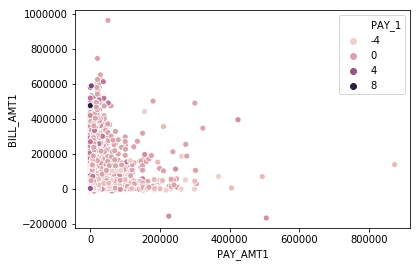

In [5]:
sns.scatterplot(creditdata['PAY_AMT1'],creditdata['BILL_AMT1'],hue=creditdata['PAY_1'])
plt.show()

In [84]:
creditdata[creditdata.PAY_1==8]['DEFAULT'].value_counts()

1    11
0     8
Name: DEFAULT, dtype: int64

In [96]:
creditdata[(creditdata['PAY_1']==-2)|(creditdata['PAY_1']==-1)|(creditdata['PAY_1']==0)][['PAY_1','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]

PAY_1  LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
1         -1     120000       2682       1725       2682       3272   
2          0      90000      29239      14027      13559      14331   
3          0      50000      46990      48233      49291      28314   
4         -1      50000       8617       5670      35835      20940   
5          0      50000      64400      57069      57608      19394   
6          0     500000     367965     412023     445007     542653   
7          0     100000      11876        380        601        221   
8          0     140000      11285      14096      12108      12211   
9         -2      20000          0          0          0          0   
10         0     200000      11073       9787       5535       2513   
11        -1     260000      12261      21670       9966       8517   
12        -1     630000      12137       6500       6500       6500   
14         0     250000      70887      67060      63561      59696   
16         0      20000      15376      18010      17428      18338   
17         0     320000     253286     246536     194663      70074   
20         0     130000      38358      27688      24489      20616   
21        -1     120000        316        316        316          0   
23        -2     450000       5512      19420       1473        560   
24         0      90000       4744       7070          0       5398   
25         0      50000      47620      41810      36023      28967   
27         0      50000      22541      16138      17163      17878   
28        -1      50000        650       3415       3416       2040   
29         0      50000      15329      16575      17496      17907   
30        -1     230000      16646      17265      13266      15339   
32         0     100000      93036      84071      82880      80958   
33        -2     500000      10929       4152      22722       7521   
34        -2     500000      13709       5006      31130       3180   
35        -1     160000      30265       -131       -527       -923   
36         0     280000     186503     181328     180422     170410   
37         0      60000      15054       9806      11068       6026   
...      ...        ...        ...        ...        ...        ...   
29960      0      10000       9406       9968       9385       5163   
29961     -2     260000          0        263          0       1368   
29963      0     610000     348392     322228     319014     347303   
29964     -1     360000        735         51      20007      18498   
29965      0     140000     134236     134663     137485     137450   
29967      0      50000      50564      49710          0      50551   
29968      0      20000      13730      15170      15277      13478   
29969      0     200000     110006      76950      63834      56768   
29970     -1     360000      33654      52686      64069      49005   
29971      0      80000      65554      66858      68279      69674   
29972      0     190000      21628      20893       5869      29223   
29975      0     220000      45075       8840       1369       5924   
29977      0     420000     131939     136721     140011     141695   
29978      0     310000     238973     237196     233854     219409   
29979     -2     180000          0          0          0          0   
29980      0      50000      43998      49123      49397      50360   
29982      0      90000       7752       9112      10306      11328   
29983     -2      20000       1822       2872       2712       2882   
29984     -1      30000        315        923       2939       1993   
29985     -2     240000          0          0          0          0   
29986     -1     360000       2220          0          0          0   
29987      0     130000      23292      14077      15546     108047   
29988      0     250000     279640     252913     243075     245750   
29989     -1     150000       3425       9009         -3        780   
29990      0     140000     138

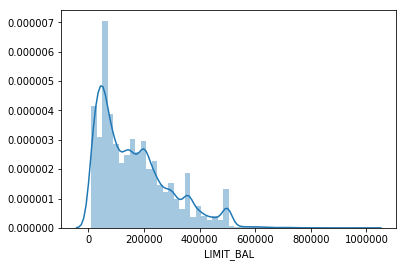

In [29]:
sns.distplot(creditdata['LIMIT_BAL'])
plt.show()

C:\Users\Pratik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pratik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


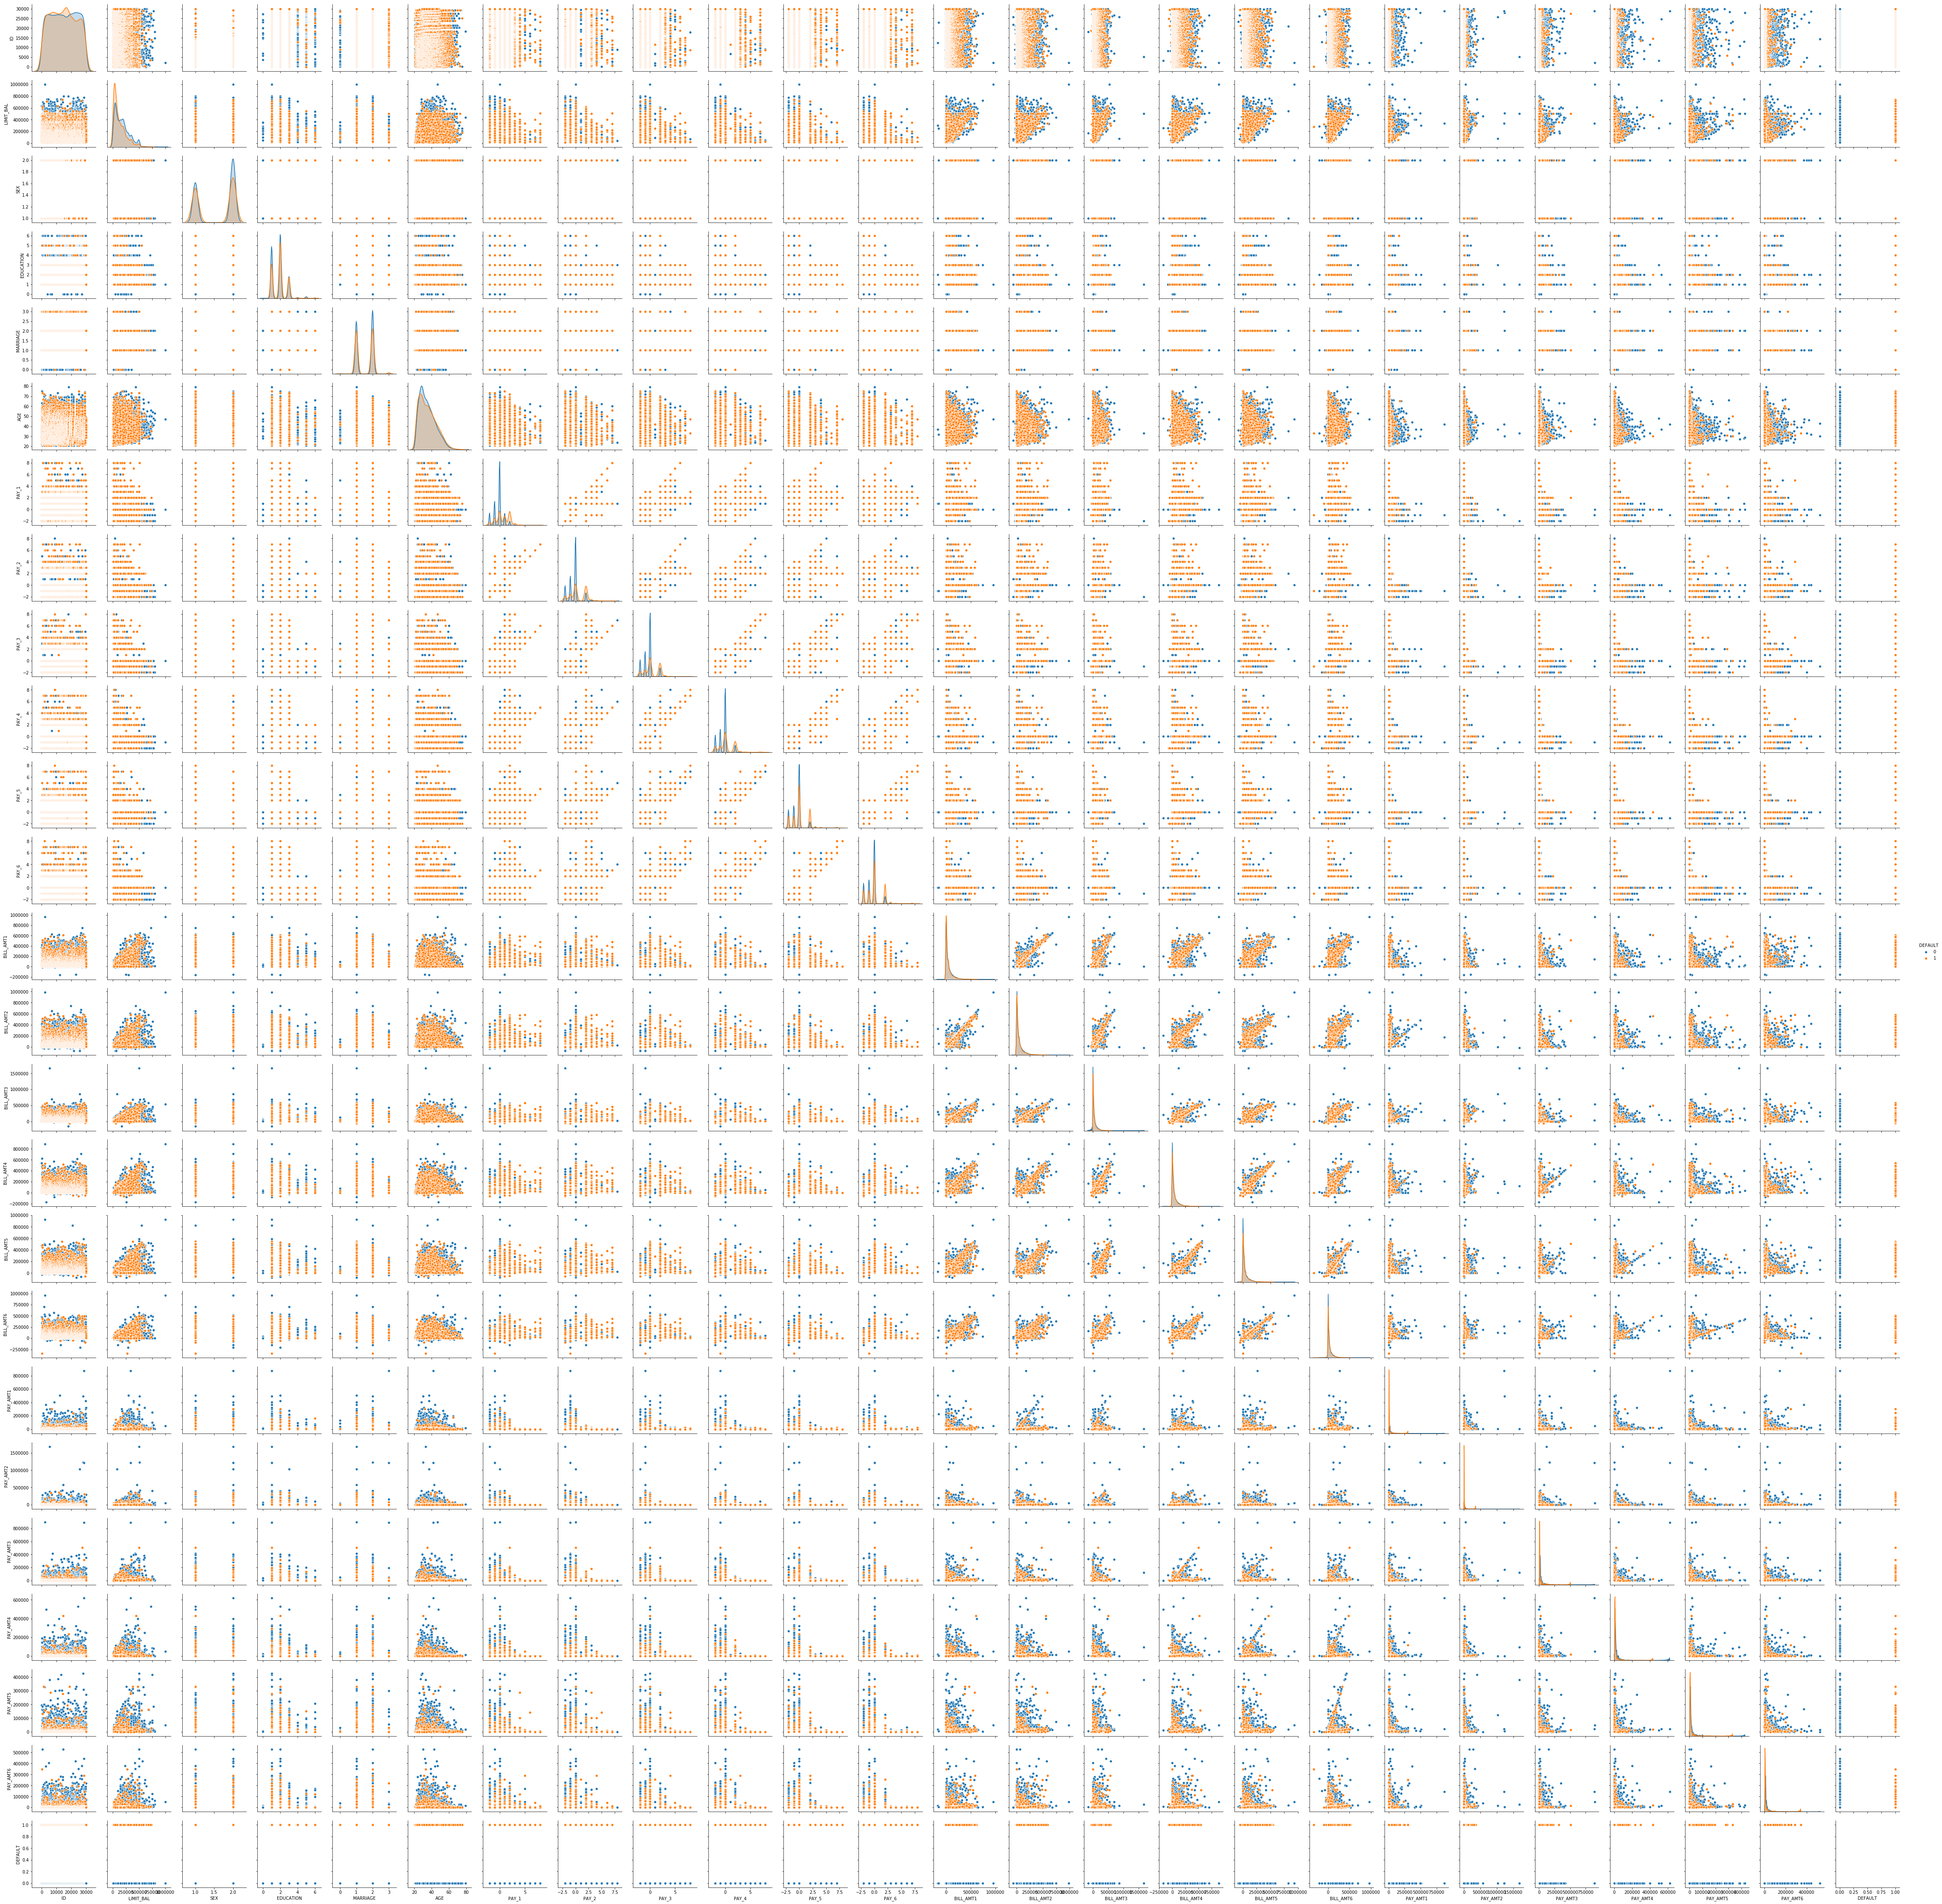

In [30]:
sns.pairplot(creditdata,hue='DEFAULT')
plt.show()

In [11]:
creditdata.duplicated(['LIMIT_BAL']).value_counts()

True     29919
False       81
dtype: int64

In [33]:
creditdata['LIMIT_BAL'].nunique()

81

In [7]:
creditdata1 = creditdata.copy()

In [8]:
creditdata1.drop('ID',axis=1)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
5          50000    1          1         2   37      0      0      0      0   
6         500000    1          1         2   29      0      0      0      0   
7         100000    2          2         2   23      0     -1     -1      0   
8         140000    2          3         1   28      0      0      2      0   
9          20000    1          3         2   35     -2     -2     -2     -2   
10        200000    2          3         2   34      0      0      2      0   
11        260000    2          1         2   51     -1     -1     -1     -1   
12        630000    2          2         2   41     -1      0     -1     -1   
13         70000    1          2         2   30      1      2      2      0   
14        250000    1          1         2   29      0      0      0      0   
15         50000    2          3         3   23      1      2      0      0   
16         20000    1          1         2   24      0      0      2      2   
17        320000    1          1         1   49      0      0      0     -1   
18        360000    2          1         1   49      1     -2     -2     -2   
19        180000    2          1         2   29      1     -2     -2     -2   
20        130000    2          3         2   39      0      0      0      0   
21        120000    2          2         1   39     -1     -1     -1     -1   
22         70000    2          2         2   26      2      0      0      2   
23        450000    2          1         1   40     -2     -2     -2     -2   
24         90000    1          1         2   23      0      0      0     -1   
25         50000    1          3         2   23      0      0      0      0   
26         60000    1          1         2   27      1     -2     -1     -1   
27         50000    2          3         2   30      0      0      0      0   
28         50000    2          3         1   47     -1     -1     -1     -1   
29         50000    1          1         2   26      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29970     360000    1          1         1   34     -1     -1     -1      0   
29971      80000    1          3         1   36      0      0      0      0   
29972     190000    1          1         1   37      0      0      0      0   
29973     230000    1          2         1   35      1     -2     -2     -2   
29974      50000    1          2         1   37      1      2      2      2   
29975     220000    1          2         1   41      0      0     -1     -1   
29976      40000    1          2         2   47      2      2      3      2   
29977     420000    1          1         2   34      0      0      0      0   
29978     310000    1          2         1   39      0      0      0      0   
29979     180000    1          1         1   32     -2     -2     -2     -2   
29980      50000    1          3         2   42      0      0      0      0   
29981      50000    1          2         1   44      1      2      2      2   
29982      90000    1          2         1   36      0      0      0      0   
29983      20000    1          2         1   44     -2     -2     -2     -2   
29984      30000    1          2         2   38     -1     -1     -2     -1   
29985     240000    1          1         2   30     -2     -2     -2     -2   
29986     360000    1          1         2   35     -1     -1     -2     -2   
29987     130000    1          1         2   34      0      0      0      0   
29988     250000    1          1         1   34      0   

In [13]:
creditdata1['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier()
X = creditdata1.drop('DEFAULT',axis=1)
y = creditdata1['DEFAULT']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = None)

In [19]:
#check on dimensions
print("The x train shape is",X_train.shape)
print("The x test shape is",X_test.shape)
print("The y train shape is",y_train.shape)
print("The y test shape is",y_test.shape)

The x train shape is (22500, 24)
The x test shape is (7500, 24)
The y train shape is (22500,)
The y test shape is (7500,)


In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(ratio = "minority")

In [24]:
x_train_reset,y_train_reset = smote.fit_sample(X_train,y_train)

In [25]:
x_test_reset,y_test_reset = smote.fit_sample(X_test,y_test)

In [26]:
print("After Oversampling the shape of xtrain is ",x_train_reset.shape)
print("After Oversampling the shape of ytrain is ",y_train_reset.shape)

After Oversampling the shape of xtrain is  (35058, 24)
After Oversampling the shape of ytrain is  (35058,)


In [27]:
print("After Oversampling the shape of xtest is ",x_test_reset.shape)
print("After Oversampling the shape of ytest is ",y_test_reset.shape)

After Oversampling the shape of xtest is  (11670, 24)
After Oversampling the shape of ytest is  (11670,)


In [28]:

print("the count of 1 is ", sum(y_train==1))
print("the count of 0 is ", sum(y_train==0))

the count of 1 is  4971
the count of 0 is  17529


In [29]:

print("the count of 1 is ", sum(y_train_reset==1))
print("the count of 0 is ", sum(y_train_reset==0))

the count of 1 is  17529
the count of 0 is  17529


In [42]:
from sklearn.metrics import accuracy_score,classification_report, cohen_kappa_score
pred = rf.fit(x_train_reset,y_train_reset).predict(x_test_reset)
acc = accuracy_score(y_test_reset,pred)
print("The Accuracy is {}".format(accuracy_score(y_test_reset, 
                                                 pred)))
print("The Kappa score is {} ".format(cohen_kappa_score(y_test_reset,pred)))
print((classification_report(y_test_reset,pred)))

The Accuracy is 0.7629820051413881
The Kappa score is 0.5259640102827763 
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      5835
           1       0.83      0.66      0.73      5835

    accuracy                           0.76     11670
   macro avg       0.78      0.76      0.76     11670
weighted avg       0.78      0.76      0.76     11670



In [37]:
count_class_0, count_class_1 = creditdata1.DEFAULT.value_counts()

# Divide by class
df_class_0 = creditdata1[creditdata1['DEFAULT'] == 0]
df_class_1 = creditdata1[creditdata1['DEFAULT'] == 1]

In [16]:
import numpy as np
a = np.linspace(0,2)
a

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])